### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [48]:
data = pd.read_csv('data/coupons.csv')

In [49]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [50]:
# Check column names with NA values  
na_columns = data.columns[data.isnull().any()].tolist()
print("Columns with NaN values:", na_columns)

# Find count of NA values per column
na_summary = data.isnull().sum()
print(na_summary[na_summary>0])

Columns with NaN values: ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [51]:
# Drop the car column as 12576/12578 columns are NAN
df_clean = data.drop(columns=['car'])

# Fill NAN values in Bar , CoffeeHouse, CarryAway,
# RestaurantLessThan20, Restaurant20To50  Column(s) with Never 
df_clean['Bar'] = df_clean['Bar'].fillna('never')
df_clean['CoffeeHouse'] = df_clean['CoffeeHouse'].fillna('never')
df_clean['CarryAway'] = df_clean['CarryAway'].fillna('never')
df_clean['RestaurantLessThan20'] = df_clean['RestaurantLessThan20'].fillna('never')
df_clean['Restaurant20To50'] = df_clean['Restaurant20To50'].fillna('never')

# Replace less1 values in Bar , CoffeeHouse, CarryAway,
# RestaurantLessThan20, Restaurant20To50  Column(s) with never
df_clean['Bar'] = df_clean['Bar'].replace('less1','never')
df_clean['CoffeeHouse'] = df_clean['CoffeeHouse'].replace('less1','never')
df_clean['CarryAway'] = df_clean['CarryAway'].replace('less1','never')
df_clean['RestaurantLessThan20'] = df_clean['RestaurantLessThan20'].replace('less1','never')
df_clean['Restaurant20To50'] = df_clean['Restaurant20To50'].replace('less1','never')




4. What proportion of the total observations chose to accept the coupon?



In [52]:
# Total number of recorded observations 
total_observations= df_clean.shape[0]
# Total number of accepted coupons
total_accepted = df_clean[df_clean['Y']==1].shape[0]
# Proprtion of total that chose to accept 
accepted_proportion = total_accepted/total_observations
print("Accepted proportion of total is",accepted_proportion)

Accepted proportion of total is 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

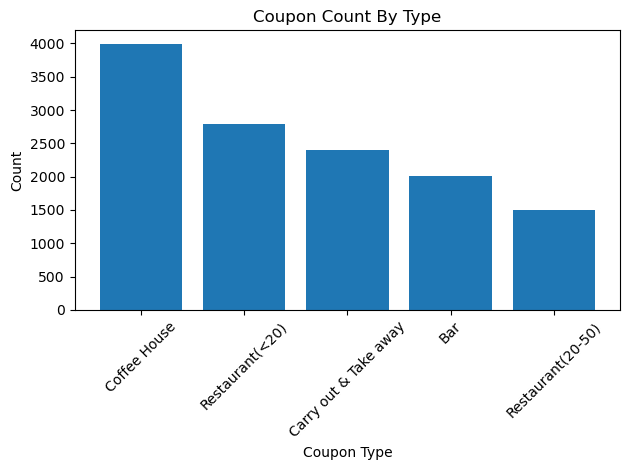

In [53]:
# Compute the value counts on the coupon column
value_counts = df_clean['coupon'].value_counts()
# Create a bar plot
plt.bar(value_counts.index, value_counts.values)
# Add x and y labels 
plt.xlabel('Coupon Type')
plt.ylabel('Count')
# Add a title 
plt.title('Coupon Count By Type')
plt.xticks(rotation=45)
plt.tight_layout()
# Save the image in images directory
plt.savefig('images/coupon_type_by_count.png')

6. Use a histogram to visualize the temperature column.

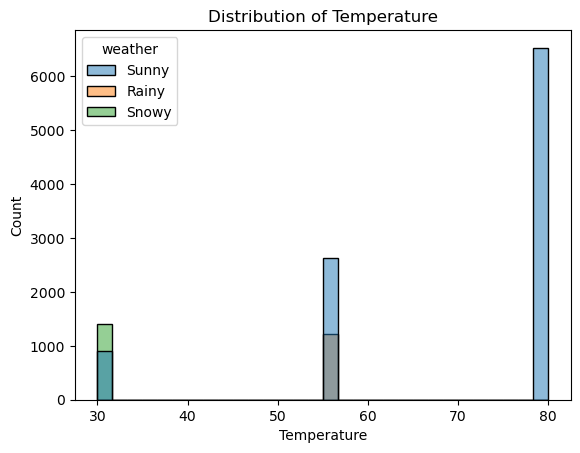

In [54]:
sns.histplot(data=df_clean, x='temperature', bins=30, hue='weather')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.savefig('images/temperature_distribution')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [55]:
# Filter coupons of type Bar
df_clean_bar = df_clean[df_clean['coupon']=='Bar']


2. What proportion of bar coupons were accepted?


In [58]:
# Total number of bar coupons
df_clean_bar_total = df_clean_bar.shape[0]

# Count of accepted bar coupons
df_clean_bar_accpeted = df_clean_bar[df_clean_bar['Y']==1].shape[0]

#Proprtion of accepted bar coupons
bar_accpted_proprtion = df_clean_bar_accpeted/df_clean_bar_total
print("Proprtion of accepted bar coupons of total is", bar_accpted_proprtion)


Proprtion of accepted bar coupons of total is 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [67]:
accepted_three_or_below_visits = df_clean_bar[(df_clean_bar['Y']==1) & (df_clean_bar['Bar'].isin(['never','1~3']))].shape[0]
# Proportion of accepted when visits is 3 or below 
accepted_three_or_below_visits_proportion = accepted_three_or_below_visits/df_clean_bar_accpeted
print("Proportion of acceptance below 3 or more bar visits",accepted_three_or_below_visits_proportion)
# Proportion of accepted when visits is above 3
accepted_more_than_three_visits = 1 - accepted_three_or_below_visits_proportion
print("Proportion of acceptance above 3 bar visits",accepted_more_than_three_visits)

# Ratio of accpting a coupon based on bar visits 
ratio_acceptance = accepted_three_or_below_visits_proportion/accepted_more_than_three_visits
print("Ratio of acceptance for 3 and below visits to above 3 visits is",ratio_acceptance)

# Verify values using value counts 
df_clean_bar[df_clean_bar['Y']==1].Bar.value_counts(normalize=True)


Proportion of acceptance below 3 or more bar visits 0.814993954050786
Proportion of acceptance above 3 bar visits 0.185006045949214
Ratio of acceptance for 3 and below visits to above 3 visits is 4.405228758169936


Bar
never    0.504232
1~3      0.310762
4~8      0.141475
gt8      0.043531
Name: proportion, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  